Defaulting to average carbon intensity 151.6503 gCO2/kWh.

In [148]:
from PIL import Image

import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from carbontracker import parser
import pandas as pd

import seaborn as sns

# Define a discrete color palette with a specified number of colors
#sns.set_palette(sns.color_palette("muted", n_colors=10))  # or use another color map and adjust `n_colors`
custom_palette = ["#FFB347", "#779ECB", "#77DD77", "#FF6961", "royalblue", "#CB99C9", "#FDFD96", "#AEC6CF"]
costum_palette_pairs = ['#ffb347', '#ffcc84', '#ffe6c2', 
                        '#779ecb', '#a4bedc', '#d2dfee', 
                        '#77dd77', '#a4e8a4', '#d2f4d2', 
                        '#ff6961', '#ff9b96', '#ffcdca', 
                        '#cb99c9', '#dcbbdb', '#eedded', 
                        '#fdfd96', '#fefeb9', '#fefedc',
                        '#aec6cf', '#c9d9df', '#e4ecef']

sns.set_palette(custom_palette)
colors = sns.color_palette()
colors_pairs = sns.color_palette(costum_palette_pairs) #("tab20c")

# set title font size
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

In [149]:
logs = parser.parse_all_logs(log_dir="./logs/")
first_log = logs[0]

print(f"Output file name: {first_log['output_filename']}")
print(f"Standard file name: {first_log['standard_filename']}")
print(f"Stopped early: {first_log['early_stop']}")
print(f"Measured consumption: {first_log['actual']}")
print(f"Predicted consumption: {first_log['pred']}")
print(f"Measured GPU devices: {first_log['components']['gpu']['devices']}")

Output file name: ./logs/10078.798700_2024-12-01T121717Z_carbontracker_output.log
Standard file name: ./logs/10078.798700_2024-12-01T121717Z_carbontracker.log
Stopped early: False
Measured consumption: {'epochs': 1, 'duration (s)': 54.0, 'energy (kWh)': 0.000472228095, 'co2eq (g)': 0.071613532315, 'equivalents': {'km travelled by car': 0.000666172394}}
Predicted consumption: None
Measured GPU devices: ['GPU', ' ANE']


# Harmonic Oscilattor: NN

In [150]:
# Create a DataFrame
df_nn = pd.DataFrame(columns=["idx", "N_epochs","N_data", "MSE", "CO2"])

# Data to be added
data_nn = [
    ['nn1a', 1000, 10000, 0.0027926568873226643, 0.201398517576],
    ['nn1b', 1000, 10000, 0.0007563308463431895, 0.232458419358],
    ['nn1c', 1000, 10000, 0.0028064365033060312, 0.209911969721],
    ['nn1d', 1000, 10000, 0.002732126507908106, 0.247300054208],
    ['nn1e', 1000, 10000, 0.0005729594849981368, 0.199333937967],
    ['nn2a', 500, 10000, 0.18215270340442657, 0.126587373819],
    ['nn2b', 500, 10000, 0.26639026403427124, 0.099806695078],
    ['nn2d', 500, 10000, 0.021775275468826294, 0.128189948483],
    ['nn3a', 750, 10000, 0.14667201042175293, 0.149009200904],
    ['nn3d', 750, 10000, 0.0016363241011276841, 0.164362213540],
    ['nn4a', 900, 10000, 0.007006393279880285, 0.176861980214],
    ['nn4b', 900, 10000, 0.09547325223684311, 0.187509671842],
    ['nn4c', 900, 10000, 0.04078313708305359, 0.183590381664],
    ['nn4d', 900, 10000, 0.0005859758821316063, 0.243277793654],
    ['nn5a', 1000, 8000, 0.13923637568950653, 0.157162650957],
    ['nn5b', 1000, 8000, 0.031628336757421494, 0.193162722604],
    ['nn5c', 1000, 8000, 0.005273216869682074, 0.153599321104],
    ['nn6a', 1000, 15000, 0.05210895836353302, 0.297128434408], 
]

# Add the data to the DataFrame
df_nn = pd.DataFrame(data_nn, columns=["idx", "N_epochs", "N_data", "MSE", "CO2"])

# Harmonic Oscilattor: PINN

In [151]:
# Create a DataFrame
df_pinn = pd.DataFrame(columns=["idx", "N_epochs", "N_data", "N_physics_data", "alpha", "MSE", "CO2"])

# Add data to the DataFrame
data_pinn = [
    ['pinn1a', 30000, 20, 50, 1e-4, 0.0001976700295927003, 0.108664597409], 
    ['pinn1b', 30000, 20, 50, 1e-4 , 2.059753933281172e-05, 0.070395766846],
    ['pinn1c', 30000, 20, 50, 1e-4 , 5.193030301597901e-05, 0.096140874300], 
    ['pinn1d', 30000, 20, 50, 1e-4 , 7.622782868565992e-05, 0.139756550463], 
    ['pinn2a', 20000, 20, 50, 1e-4 , 9.569521353114396e-06, 0.160361407224],
    ['pinn2b', 20000, 20, 50, 1e-4, 2.0301709810155444e-05, 0.076850469671],
    ['pinn2c', 20000, 20, 50, 1e-4, 9.702605893835425e-05, 0.069063120003],
    ['pinn2c', 20000, 20, 50, 1e-4, 0.0001003579527605325, 0.096956735736],
    ['pinn3a', 10000, 20, 50, 1e-4,  0.0001811653928598389, 0.025635291679],
    ['pinn3b', 10000, 20, 50, 1e-4, 0.001048471312969923, 0.014020376234],
    ['pinn3c', 10000, 20, 50, 1e-4, 0.00023084513668436557, 0.012033602826],
    ['pinn3d', 10000, 20, 50, 1e-4, 0.004909813869744539, 0.063793685358],
    ['pinn4a', 10000, 10, 50, 1e-4,  0.24197590351104736, 0.004874011174],
    ['pinn4b', 10000, 10, 50, 1e-4,  0.1570255607366562, 0.004217182307],
    ['pinn4c', 10000, 10, 50, 1e-4, 0.04193224012851715, 0.004838652668],
    ['pinn5a', 10000, 20, 25, 1e-4, 0.0003161463828291744, 0.023065260524],
    ['pinn5b', 10000, 20, 25, 1e-4, 0.00013917680189479142, 0.062111225878],
    ['pinn5c', 10000, 20, 25, 1e-4, 0.0013436820590868592, 0.015181683936],
]

# Add the data to the DataFrame
df_pinn = pd.DataFrame(data_pinn, columns=["idx", "N_epochs", "N_data", "N_physics_data", "alpha", "MSE", "CO2"])

# Harmonic Oscilattor: Results

Number of NN experiments: 18
Number of PINN experiments: 18


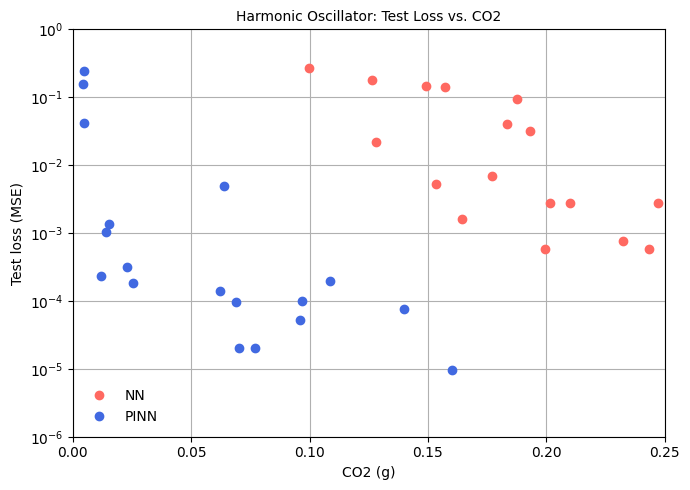

In [152]:
# print number of experiments
print(f"Number of NN experiments: {len(df_nn)}")
print(f"Number of PINN experiments: {len(df_pinn)}")

# plot mse vs co2 for each element in group
plt.figure(figsize=(7, 5))

# NN
plt.errorbar(df_nn["CO2"], np.log10(df_nn["MSE"]), fmt='o', label="NN", color=colors[3])

# PINN
plt.errorbar(df_pinn["CO2"], np.log10(df_pinn["MSE"]), fmt='o', label="PINN", color=colors[4])

# change y-ticks to log 
plt.yticks(np.arange(-6, 1, 1), [f"$10^{{{i}}}$" for i in np.arange(-6, 1, 1)])

plt.xlabel("CO2 (g)")
plt.ylabel("Test loss (MSE)")
plt.title("Harmonic Oscillator: Test Loss vs. CO2")
plt.legend(loc='lower left', frameon=False, ncols=1)
plt.ylim(-6, 0)
plt.xlim(0, 0.25)
#plt.yscale("log")
plt.grid(True)
plt.tight_layout()
plt.show()

# Damped Harmonic Oscilattor: NN

In [153]:
# Create a DataFrame
df_nn = pd.DataFrame(columns=["idx", "N_epochs","N_data", "MSE", "CO2"])

# Add data to the DataFrame
data_nn = [
    ['nn1a', 3000, 5000,  0.12588979303836823, 0.469810731382], 
    ['nn2a', 1000, 10000,  0.06478975713253021, 0.069325290595], 
    ['nn3a', 3000, 10000,  0.07149533927440643, 0.173535132098], 
    ['nn3b', 3000, 10000,  0.112187378108501433, 0.119193878453], 
    ['nn4a', 10000, 5000,  0.028444558382034302, 0.313702005720], 
    ['nn5a', 8000, 5000,  0.23059767484664917, 0.259210881998],
    ['nn6a', 8000, 10000,  0.2713038921356201, 0.405457917810], 
    ['nn7a', 8000, 10000,  0.11618971824645996, 0.261750362731],
    ['nn8a', 5000, 5000,  0.044079288840293884, 0.151610645113],
    ['nn9a', 5000, 5000,  0.019864948466420174, 0.194148513588],
    ['nn10a', 5000, 5000,  0.09984350949525833, 0.160341700784],
    ['nn11a', 5000, 5000,  0.07803896814584732, 0.271288441969],
    ['nn12a', 5000, 5000,  0.17352163791656494, 0.257671778215],
    ['nn13a', 1500, 6000,  0.14259269833564758, 0.413912687696],
    ['nn13b', 1500, 6000,  0.10785461217164993, 0.221451105243],
    ['nn14a', 1500, 6000,  0.16165375709533691, 0.191111386375],
    ['nn15a', 1500, 6000,  0.43658387660980225, 0.386660056589],
    ['nn15a', 1000, 10000,  0.14926636219024658, 0.077229443200],


]

# Add the data to the DataFrame
df_nn = pd.DataFrame(data_nn, columns=["idx", "N_epochs", "N_data", "MSE", "CO2"])

# Damped Harmonic Oscilattor: PINN

In [154]:
# Create a DataFrame
df_pinn = pd.DataFrame(columns=["idx", "N_epochs", "N_data", "N_physics_data", "alpha", "MSE", "CO2"])

# Add data to the DataFrame
data_pinn = [
    ['pinn1a', 5000, 20, 50, 1e-4, 0.0031749936752021313, 0.032883211506], 
    ['pinn2a', 20000, 20, 50, 1e-4, 8.186866762116551e-05, 0.088366443492], 
    ['pinn3a', 10000, 20, 25, 1e-4, 2.4135248168022372e-05, 0.047677462146], 
    ['pinn3b', 10000, 20, 25, 1e-4, 0.000148119026562199, 0.063829636098],
    ['pinn4a', 5000, 20, 25, 1e-4, 0.0006982630002312362, 0.027865901878],
    ['pinn5a', 10000, 20, 100, 1e-4, 3.5516623029252514e-05, 0.204335746256], 
    ['pinn6a', 10000, 100, 50, 1e-4, 7.36383008188568e-05, 0.070003551859], 
    ['pinn6b', 10000, 100, 50, 1e-4, 2.5590865334379487e-05, 0.038571950310],
    ['pinn7a', 10000, 100, 100, 1e-4, 1.591064028616529e-05, 0.264152261907],
    ['pinn8a', 10000, 100, 200, 1e-4, 3.8030695577617735e-05, 0.220827355285],
    ['pinn9a', 10000, 100, 1000, 1e-4, 3.34430587827228e-05, 0.534287171756],
    ['pinn9b', 10000, 100, 1000, 1e-4, 4.7911875299178064e-05, 0.343081574448],
    ['pinn10a', 10000, 50, 50, 1e-4, 0.0001429376716259867, 0.007022652314],
    ['pinn11a', 7000, 50, 50, 1e-4, 0.00028705463046208024, 0.029909297927],
    ['pinn12a', 7000, 100, 100, 1e-4, 3.965251744375564e-05, 0.058044961362],
    ['pinn13a', 30000, 100, 50, 1e-4, 5.923169374000281e-05, 0.131136375162],
    ['pinn13b', 30000, 100, 50, 1e-4, 3.375862434040755e-05, 0.175504093832],
    ['pinn14b', 4000, 100, 50, 1e-4, 0.002451665000990033, 0.028546868924],
]

# Add the data to the DataFrame
df_pinn = pd.DataFrame(data_pinn, columns=["idx", "N_epochs", "N_data", "N_physics_data", "alpha", "MSE", "CO2"])

# Damped Harmonic Oscilattor: Results

Number of NN experiments: 18
Number of PINN experiments: 18


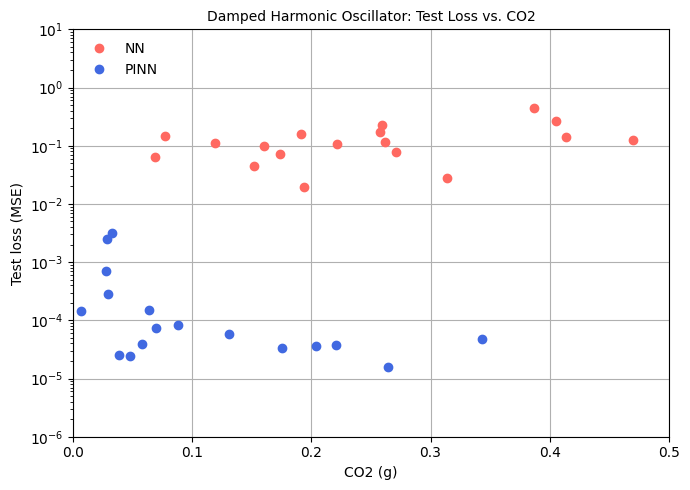

In [155]:
# print number of experiments
print(f"Number of NN experiments: {len(df_nn)}")
print(f"Number of PINN experiments: {len(df_pinn)}")

# plot mse vs co2 for each element in group

plt.figure(figsize=(7, 5))
plt.errorbar(df_nn["CO2"], df_nn["MSE"], fmt='o', label="NN", color=colors[3])
plt.errorbar(df_pinn["CO2"], df_pinn["MSE"], fmt='o', label="PINN", color=colors[4])
plt.xlabel("CO2 (g)")
plt.ylabel("Test loss (MSE)")
plt.title("Damped Harmonic Oscillator: Test Loss vs. CO2")
plt.legend(loc="upper left", frameon=False, ncol=1)
plt.ylim(1e-6, 10)
plt.xlim(0, 0.5)
plt.yscale("log")
plt.grid(True)
plt.tight_layout()
plt.show()